In [1]:
import torch # YOLOv5 implemented using pytorch

In [2]:
from IPython.display import Image #this is to render predictions

In [3]:
#!git clone https://github.com/ultralytics/yolov5

In [4]:
%cd yolov5

D:\yolov5_pytorch_to_tflite_android_app\yolov5


In [5]:
#!pip install -r requirements.txt

In [6]:
from tqdm import tqdm
import IProgress
from ipywidgets import IntProgress

In [7]:
#torch.cuda.get_arch_list() 

In [8]:
print('All set. Using PyTorch version %s with %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

All set. Using PyTorch version 1.8.1+cu111 with _CudaDeviceProperties(name='GeForce RTX 3090', major=8, minor=6, total_memory=24576MB, multi_processor_count=82)


# Training the yolov5 Model

 Once all the files are cloned, you’ll need to move the dataset’s dataset.yaml file to the yolov5/data directory. 
 This file contains information required by YOLO to train the model on the custom data. 

In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --cache

At the end of the training, two files should be saved in yolov5/runs/train/exp/weights: last.pt and best.pt. We’ll use best.pt.

If you want to explore the metrics recorded during training, I suggest you use TensorBoard, a very interactive exploration tool:

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

# Testing the Model on Google Colab
Let’s explore now how confident our model is. We can plot a validation batch obtained during training and inspect the confidence score of each label:

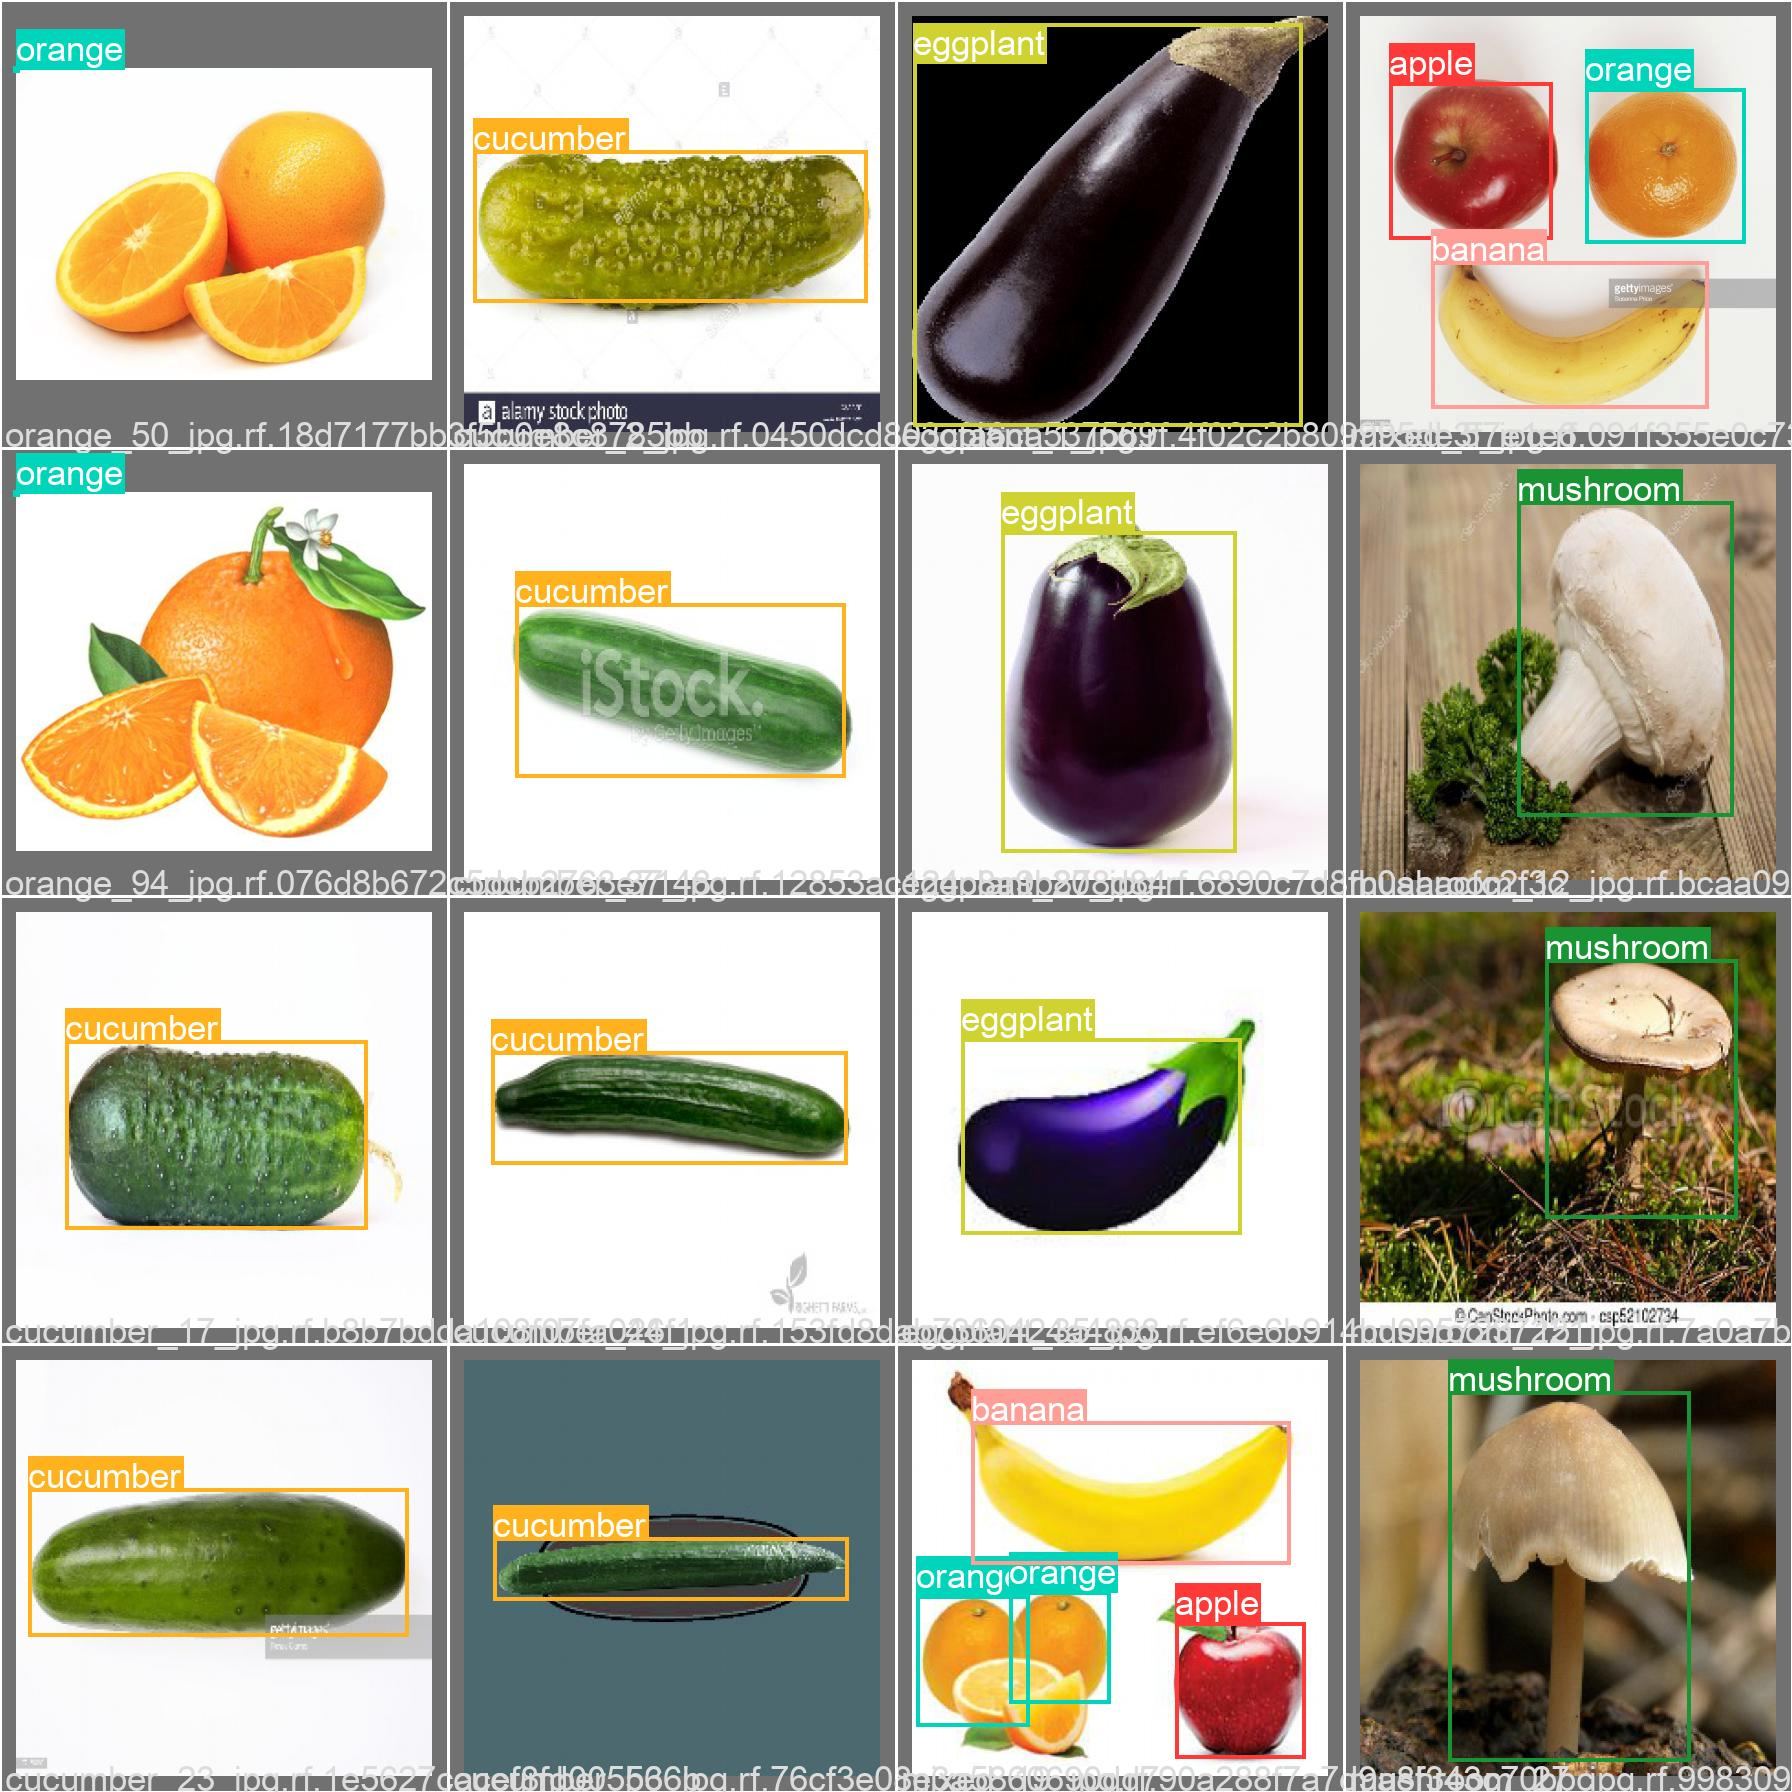

In [13]:
Image(filename='runs/train/exp2/val_batch0_labels.jpg', width=1000)

# Testing the Model:

In [14]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.25 --source runs/train/exp2/test_images

detect: weights=['runs/train/exp2/weights/best.pt'], source=runs/train/exp2/test_images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-177-gd059d1d torch 1.8.1+cu111 CUDA:0 (GeForce RTX 3090, 24576MiB)

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
image 1/5 D:\yolov5_pytorch_to_tflite_android_app\yolov5\runs\train\exp2\test_images\test_1.jpg: 416x416 1 cheetos, Done. (0.007s)
image 2/5 D:\yolov5_pytorch_to_tflite_android_app\yolov5\runs\train\exp2\test_images\test_2.jpg: 416x416 1 reese, Done. (0.006s)
image 3/5 D:\yolov5_pytorch_to_tflite_android_app\yolov5\runs\train\exp2\test_images\test_3.jpg: 41

# Yolov5 model is trained and tested. 

# Now next step is to convert it into a tflite model, so that we can use it on android phone


### you have best.pt and last.pt inside runs\train\exp2\weights

In [15]:
# Convert weights to fp16 TFLite model

!python export.py --weights runs/train/exp2/weights/best.pt --include tflite --img 416

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(1, 416, 416, 3)]   0                                            
__________________________________________________________________________________________________
tf_conv (TFConv)                (1, 208, 208, 32)    3488        input_1[0][0]                    
__________________________________________________________________________________________________
tf_conv_1 (TFConv)              (1, 104, 104, 64)    18496       tf_conv[0][0]                    
__________________________________________________________________________________________________
tf_c3 (TFC3)                    (1, 104, 104, 64)    18624       tf_conv_1[0][0]                  
______________________________________________________________________________________________

export: data=D:\yolov5_pytorch_to_tflite_android_app\yolov5\data\coco128.yaml, weights=['runs/train/exp2/weights/best.pt'], imgsz=[416], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5  v6.1-177-gd059d1d torch 1.8.1+cu111 CPU

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from runs\train\exp2\weights\best.pt with output shape (1, 10647, 17) (13.7 MB)
2022-05-11 09:13:12.005934: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll

TensorFlow SavedModel: starting export with tensorflow 2.5.0...

                 from  n    params  module                                  arguments                     
2022-05-11 09:13:13.742510:

In [16]:
#After running the above command, you will have best-fp16.tflite in runs\train\exp2\weights folder

# Lets run the created tflite model.

!python detect.py --weights runs\train\exp2\weights\best-fp16.tflite --img 416 --conf 0.25 --source runs/train/exp2/test_images

detect: weights=['runs\\train\\exp2\\weights\\best-fp16.tflite'], source=runs/train/exp2/test_images, data=data\coco128.yaml, imgsz=[416, 416], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-177-gd059d1d torch 1.8.1+cu111 CUDA:0 (GeForce RTX 3090, 24576MiB)

2022-05-11 09:16:17.519269: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
Loading runs\train\exp2\weights\best-fp16.tflite for TensorFlow Lite inference...
image 1/5 D:\yolov5_pytorch_to_tflite_android_app\yolov5\runs\train\exp2\test_images\test_1.jpg: 416x416 1 car, Done. (0.128s)
image 2/5 D:\yolov5_pytorch_to_tflite_android_app\yolov5\runs\train\exp2\test_imag

# Our model is working fine and results are stored in runs\detect\exp3

In [18]:
#Convert weights to int8 TFLite model

#!python export.py --weights runs/train/exp2/weights/best.pt --include tflite --int8 --img 416 --data data/coco128.yaml

## 3. Clone this repo (tf-android branch) for Android app
git clone https://github.com/zldrobit/yolov5.git yolov5-android

In [20]:
%cd ..

D:\yolov5_pytorch_to_tflite_android_app


In [19]:
!git clone https://github.com/zldrobit/yolov5.git yolov5-android

Cloning into 'yolov5-android'...


### Now Put TFLite models in assets folder of Android project, and change

And then open android/app/src/main/java/org/tensorflow/lite/examples/detection/tflite/DetectorFactory.java

Do the following changes:

inputSize to --img

output_width according to new/old inputSize ratio

anchors to m.anchor_grid as https://github.com/ultralytics/yolov5/pull/1127#issuecomment-714651073

in android/app/src/main/java/org/tensorflow/lite/examples/detection/tflite/DetectorFactory.java

labelFilename according to the classes of the model

in https://github.com/zldrobit/yolov5/blob/522d65e848d3e5a378eb0f29a9fbb204221400e8/android/app/src/main/java/org/tensorflow/lite/examples/detection/tflite/DetectorFactory.java#L19-L48.
    
Then run the program in Android Studio.